## 한글 패키지 & 마이너스 문제 해결

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 17 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (21.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120901 files and direc

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.rc('axes', unicode_minus=False)

## 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## CSV 파일 불러오기

In [3]:
from google.colab import files
uploaded = files.upload()

Saving health_screenings_2020_1000ea.csv to health_screenings_2020_1000ea (1).csv


## CSV 파일 확인하기

In [4]:
file = open('health_screenings_2020_1000ea.csv')
data = pd.read_csv(file)
data

,year,city_code,gender,age_code,height,weight,waist,eye_left,eye_right,hear_left,...,serum,AST,ALT,GTP,smoking,drinking,oral_check,dental_caries,tartar,open_date
0,2020,36,1,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,1,0,0,NaN,NaN,2021-12-29
1,2020,27,2,13,150,65,81.0,0.8,0.8,1,...,0.5,18.0,15.0,15.0,1,0,0,NaN,NaN,2021-12-29
2,2020,11,2,12,155,55,70.0,0.6,0.7,1,...,0.7,27.0,25.0,7.0,1,0,0,NaN,NaN,2021-12-29
3,2020,31,1,13,160,70,90.8,1.0,1.0,1,...,1.2,65.0,97.0,72.0,1,0,1,0.0,0.0,2021-12-29
4,2020,41,2,12,155,50,75.2,1.5,1.2,1,...,0.7,18.0,17.0,14.0,1,0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2020,48,1,12,165,70,92.0,0.5,0.9,1,...,0.8,21.0,30.0,39.0,3,1,0,NaN,NaN,2021-12-29
996,2020,41,1,12,165,70,88.0,1.2,1.0,1,...,0.7,29.0,37.0,21.0,2,0,1,0.0,0.0,2021-12-29
997,2020,48,2,14,155,55,80.2,0.5,0.6,1,...,0.9,36.0,35.0,34.0,1,1,1,1.0,1.0,2021-12-29
998,2020,41,2,14,150,55,79.5,1.0,1.0,1,...,0.7,30.0,29.0,20.0,1,0,0,NaN,NaN,2021-12-29


## 산점도(Scatter) 그래프

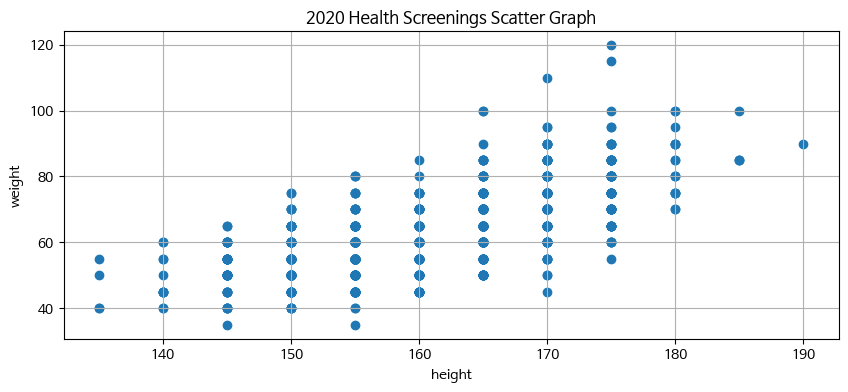

In [5]:
heightdata = data['height']
weightdata = data['weight']

plt.figure(figsize=(10, 4))
plt.scatter(heightdata, weightdata)

plt.xlabel('height')
plt.ylabel('weight')
plt.title('2020 Health Screenings Scatter Graph')
plt.grid()
plt.show()

In [10]:
print(heightdata, weightdata)

0      165
1      150
2      155
3      160
4      155
      ... 
995    165
996    165
997    155
998    150
999    160
Name: height, Length: 1000, dtype: int64 0      60
1      65
2      55
3      70
4      50
       ..
995    70
996    70
997    55
998    55
999    60
Name: weight, Length: 1000, dtype: int64


In [6]:
np.corrcoef(heightdata, weightdata)[0,1]

0.687973924193209

In [11]:
from scipy import stats

stats.pearsonr(heightdata, weightdata)

PearsonRResult(statistic=0.6879739241932086, pvalue=4.1779838027362285e-141)

## 그룹 산점도 그래프

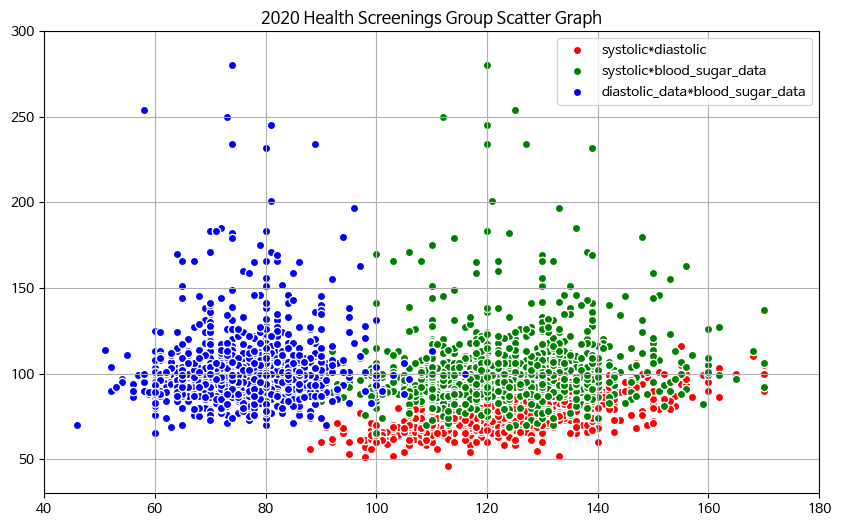

In [13]:
systolic_data = data['systolic']
diastolic_data = data['diastolic']
blood_sugar_data = data['blood_sugar']

plt.figure(figsize=(10, 6))

plt.scatter(systolic_data, diastolic_data, color='r', edgecolor='w', label='systolic*diastolic')
plt.scatter(systolic_data, blood_sugar_data, color='g', edgecolor='w', label='systolic*blood_sugar_data')
plt.scatter(diastolic_data, blood_sugar_data, color='b', edgecolor='w', label='diastolic_data*blood_sugar_data')

plt.xlim(40, 180)
plt.ylim(30, 300)
plt.title('2020 Health Screenings Group Scatter Graph')
plt.legend()
plt.grid()
plt.show()

In [14]:
stats.pearsonr(systolic_data, diastolic_data) # 결측치로 인해 둘 사이의 피어슨 상관계수를 구할 수 없음.

ValueError: ignored

In [15]:
a = np.array([np.nan, np.nan, 1, 2, 3])
b = np.array([np.nan, np.nan, 10, 14, 16])

np.corrcoef(a, b)[0, 1]

nan

In [16]:
a = [x for x in a if not np.isnan(x)]
b = [x for x in a if not np.isnan(x)]

np.corrcoef(a, b)[0, 1]

1.0

In [17]:
a = np.array([np.nan, np.nan, 1, 2, 3])
b = np.array([np.nan, 3, 10, 14, 16])

a = [x for x in a if not np.isnan(x)]
b = [x for x in a if not np.isnan(x)]

np.corrcoef(a, b)[0, 1]

1.0

In [18]:
a = np.array([np.nan, np.nan, 1, 2, 3])
b = np.array([np.nan, 10, np.nan, 14, 16])

a = [x for x in a if not np.isnan(x)]
b = [x for x in a if not np.isnan(x)]

np.corrcoef(a, b)[0, 1]

1.0

In [20]:
a = np.array([np.nan, np.nan, 1, 2, 3])
b = np.array([np.nan, 10, np.nan, 14, 16])

a = np.ma.masked_invalid(a)
b = np.ma.masked_invalid(b)

print(a)
print(b)

np.ma.corrcoef(a, b)[0, 1]

[-- -- 1.0 2.0 3.0]
[-- 10.0 -- 14.0 16.0]


1.0

In [21]:
systolic_data = np.ma.masked_invalid(systolic_data)
diastolic_data = np.ma.masked_invalid(diastolic_data)
blood_sugar_data = np.ma.masked_invalid(blood_sugar_data)

print(np.ma.corrcoef(systolic_data, diastolic_data)[0,1])
print(np.ma.corrcoef(systolic_data, blood_sugar_data)[0,1])
print(np.ma.corrcoef(diastolic_data, blood_sugar_data)[0,1])

0.7049093123776548
0.11464574274549072
0.10071791811269364


## 히스토그램 그래프
변수가 하나인 데이터의 빈도수를 막대(bar) 그래프로 표현
데이터 분포를 파악하는데 주로 사용

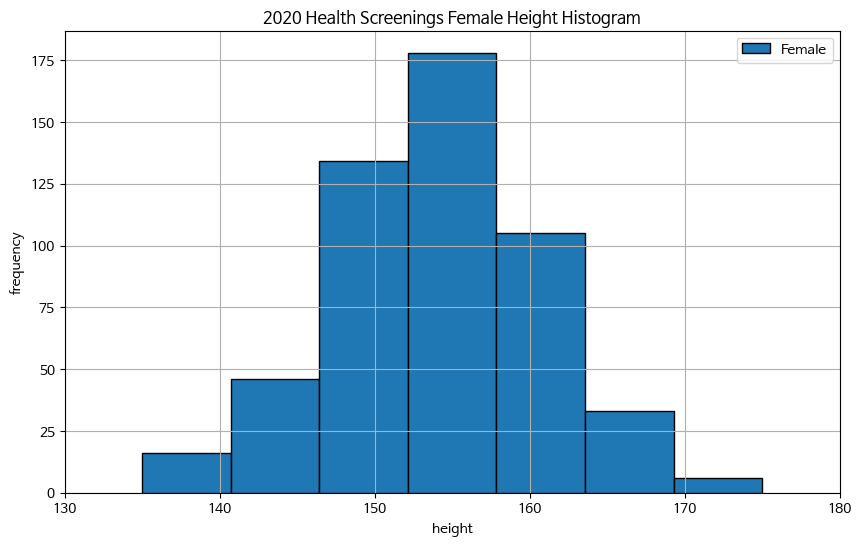

In [22]:
# 여성(gender=2)의 키(height) 데이터를 'female_height'에 저장
female_height = data.loc[data.gender==2, ['gender', 'height']]

plt.figure(figsize=(10, 6))
plt.hist(female_height['height'], bins=7, label='Female', ec='k')

plt.xlim(130, 180)
plt.xlabel('height')
plt.ylabel('frequency')
plt.title('2020 Health Screenings Female Height Histogram')
plt.legend()
plt.grid()
plt.show()

## 그룹 히스토그램 그래프

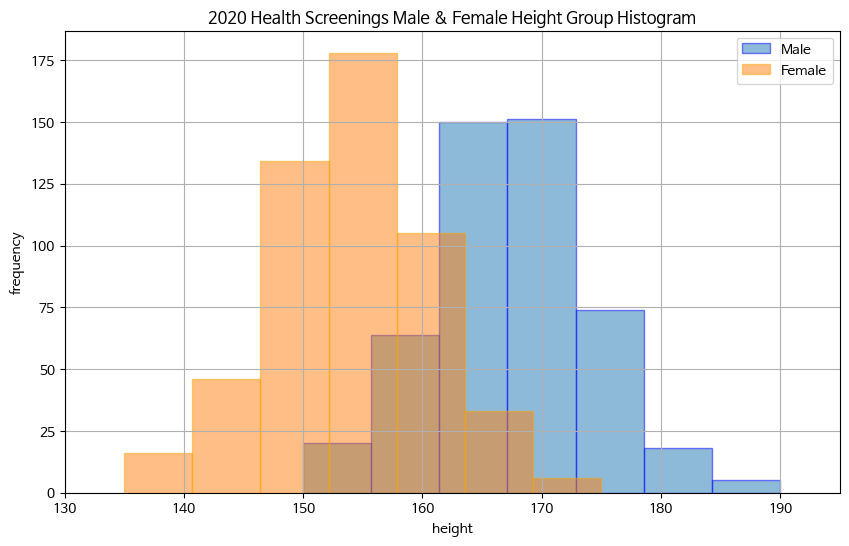

In [25]:
male_data = data.loc[data.gender==1, ['gender', 'height']]
female_data = data.loc[data.gender==2, ['gender', 'height']]

plt.figure(figsize=(10, 6))
plt.hist(male_data['height'], bins=7, alpha=0.5, label='Male', ec='b')
plt.hist(female_data['height'], bins=7, alpha=0.5, label='Female', ec='orange')

plt.xlim(130, 195)
plt.xlabel('height')
plt.ylabel('frequency')
plt.title('2020 Health Screenings Male & Female Height Group Histogram')
plt.legend()
plt.grid()
plt.show()

## 상자 수염 그래프


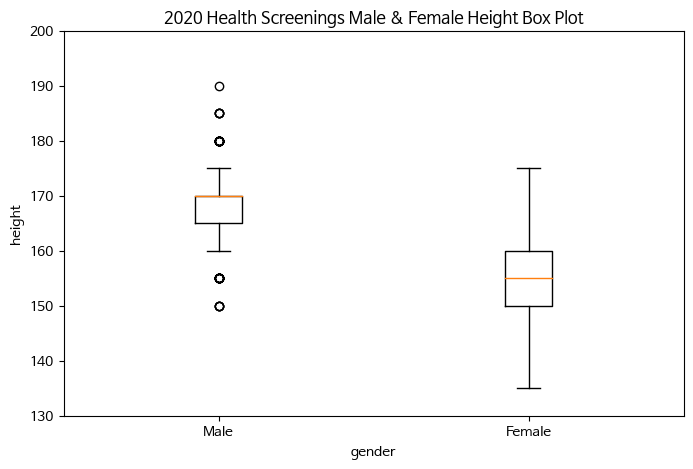

In [26]:
import numpy as np
height = np.array([male_data['height'], female_data['height']], dtype=object)

plt.figure(figsize=(8,5))
plt.boxplot(height, labels=['Male', 'Female'])

plt.ylim(130, 200)
plt.xlabel('gender')
plt.ylabel('height')
plt.title('2020 Health Screenings Male & Female Height Box Plot')
plt.show()